CODE FOR K Nearest Neighbour Model: 
Built based on the Social Network Ads . CSV

In [1]:
#Import the Necessary Libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tkinter import Tk, filedialog


In [2]:
#Read Data in:
RAW_Data = filedialog.askopenfilename(title="Select CSV file", filetypes=[("CSV files", "*.csv")])
#We're doing an analysis on Audi customers
Data = pd.read_csv(RAW_Data) #read in file 'Data.csv' 
#Now we'd need to look at what are the features, and what is the dependent variable vector based on our data set
    #features are our predecitive measures: i.e., country, age, and salary
    #our dependent variable is S-Line purchases - usually is the last column
X = Data.iloc[:,:-1].values # mean get all values except ones in last column (our predictive measures)
y = Data.iloc[:,-1].values # gets values for last column! Will they buy, yes or no.
print(X)
print(y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [3]:
#Splitting the dataset into the Training Set and Test Set:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train)

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  72000]
 [    45  26000]
 [    33  69000]
 [    20  82000]
 [    31  74000]
 [    42  80000]
 [    35  72000]
 [    33 149000]
 [    40  71000]
 [    51 146000]
 [    46  79000]
 [    35  75000]
 [    38  51000]
 [    36  75000]
 [    37  78000]
 [    38  61000]
 [    60 108000]
 [    20  82000]
 [    57  74000]
 [    42  65000]
 [    26  8000

In [4]:
#Featuring Scaling: *after splitting to avoid data leakage
    #need to scale age and average salary
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #no fit transform so there's no data leakage
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [5]:
#Training the KNN Model: 
from sklearn.neighbors import KNeighborsClassifier
Classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2 )
Classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
#Predict a new result:
    #Predict if a 30 yearold with a salary of 87k will buy

print(Classifier.predict(sc.transform([[30, 87000]]))) # you can also use predict proba to find probability of yes/no
#***REMEBER WE HAD TO FEATURE SCALE THESE SINGLE INPUTS ABOVE TO GET THE CORRECT RESPONSE ^^^

[0]


In [7]:
#Predicting the test set results:
y_predicted = Classifier.predict(X_test)
# dispaly the results side by side in two vectors:
#np.set_printoptions(precision=2) #this forces the number of decimals (not useful for this example)
#displaying the two vectors:
print(np.concatenate((y_predicted.reshape(len(y_predicted), 1), y_test.reshape(len(y_test), 1)), 1))


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


In [8]:
#Making a Confusion Matrix: Shows how many mistakes and correct predictions
from sklearn.metrics import confusion_matrix, accuracy_score
Confusion_Matrix = confusion_matrix(y_test, y_predicted)
Accuracy_Score = accuracy_score(y_test, y_predicted)
print(Confusion_Matrix)
print(Accuracy_Score) #Rate of correct predictions 


[[64  4]
 [ 3 29]]
0.93


VISUALIZE THE RESULTS!

C:\Users\ethan\AppData\Local\Temp\ipykernel_13740\3531458342.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap(i), label = j)


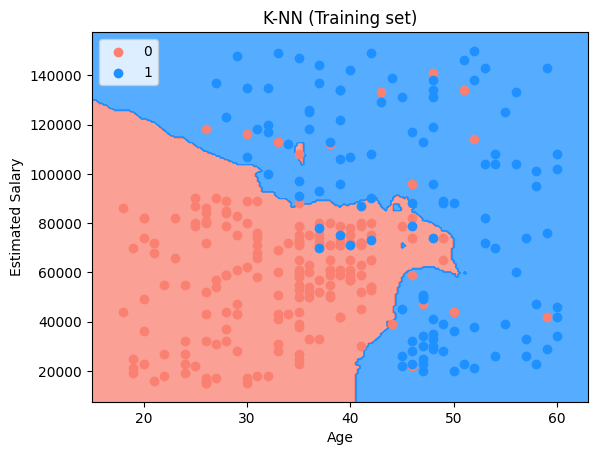

In [10]:
#Visualizing the Training Set Results - this useless for any data set with more than two features

from matplotlib.colors import ListedColormap
h = .02
X0_min, X0_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
X1_min, X1_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
X0, X1 = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
X0_unscaled, X1_unscaled = sc.inverse_transform(np.c_[X0.ravel(), X1.ravel()]).T.reshape(2, X0.shape[0], X0.shape[1])
colormap = ListedColormap(('salmon', 'dodgerblue'))
plt.contourf(X0_unscaled, X1_unscaled, Classifier.predict(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape),
             alpha=0.75, cmap=colormap)
X_set, y_set = sc.inverse_transform(X_train), y_train
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap(i), label = j)
xLower, xUpper = min(X_set[:, 0]), max(X_set[:, 0])
yLower, yUpper = min(X_set[:, 1]), max(X_set[:, 1])
xMargin, yMargin = xUpper * 0.05, yUpper * 0.05
plt.xlim(xLower - xMargin, xUpper + xMargin)
plt.ylim(yLower - yMargin, yUpper + yMargin)
plt.title("K-NN (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

C:\Users\ethan\AppData\Local\Temp\ipykernel_13740\233806142.py:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap(i), label = j)


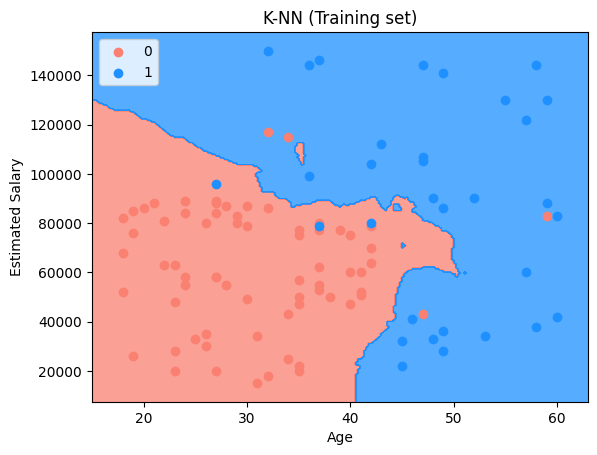

In [11]:
#For the TEST DATA:

from matplotlib.colors import ListedColormap
h = .02
X0_min, X0_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
X1_min, X1_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
X0, X1 = np.meshgrid(np.arange(X0_min, X0_max, h), np.arange(X1_min, X1_max, h))
X0_unscaled, X1_unscaled = sc.inverse_transform(np.c_[X0.ravel(), X1.ravel()]).T.reshape(2, X0.shape[0], X0.shape[1])
colormap = ListedColormap(('salmon', 'dodgerblue'))
plt.contourf(X0_unscaled, X1_unscaled, Classifier.predict(np.c_[X0.ravel(), X1.ravel()]).reshape(X0.shape),
             alpha=0.75, cmap=colormap)
X_set, y_set = sc.inverse_transform(X_test), y_test
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = colormap(i), label = j)
xLower, xUpper = min(X_set[:, 0]), max(X_set[:, 0])
yLower, yUpper = min(X_set[:, 1]), max(X_set[:, 1])
xMargin, yMargin = xUpper * 0.05, yUpper * 0.05
plt.xlim(xLower - xMargin, xUpper + xMargin)
plt.ylim(yLower - yMargin, yUpper + yMargin)
plt.title("K-NN (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()